# Lab 6 - Kamil Pieprzycki 402037

In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Excercise 1 - generate data

In [2]:
code1=CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [3]:
code2=CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [10]:
N = (len("Kamil") + len("Pieprzycki"))*100
stan_data = {"N": N}
fit_1 = code1.sample(data=stan_data, iter_sampling=1, chains=1)
fit_2 = code2.sample(data=stan_data, iter_sampling=1, chains=1)
d1=fit_1.draws_pd()
d2=fit_2.draws_pd()


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [12]:
d1.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
0,0.0,0.0,0.01,-0.474416,-0.321906,0.733617,0.848716,1.75841,-0.653874,-1.09961,...,1.89928,-0.32685,0.457047,-0.020532,1.21334,-2.08949,-1.29134,-0.13878,0.296382,-0.060873


In [13]:
d2.head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
0,0.0,0.0,0.28066,0.085619,0.876533,-0.474939,-0.494702,-0.540342,0.203191,1.40566,...,-5.14251,-1.77449,3.09911,-0.58524,-0.458691,-4.75365,-3.07089,-1.70454,4.18512,-0.674134


### Excercise 2 - compare normal and student models for data from first file

In [16]:
code_3=CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:compiling stan file /home/lab6/code_3.stan to exe file /home/lab6/code_3
INFO:cmdstanpy:compiled model executable: /home/lab6/code_3


In [20]:
code_4=CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:compiling stan file /home/lab6/code_4.stan to exe file /home/lab6/code_4
INFO:cmdstanpy:compiled model executable: /home/lab6/code_4


In [23]:
data_fit = {"N": N, "y": d1.loc[:, 'y[1]':f'y[{N}]'].values.reshape((N,))}
fit_3= code_3.sample(data=data_fit)
fit_4= code_4.sample(data=data_fit)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)





chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                     
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


Using az.compare and az.plot_compare analyze both models using loo and waic criteria.

In [29]:
azdata3 = az.from_cmdstanpy(posterior=fit_3)
azdata4 = az.from_cmdstanpy(posterior=fit_4)

In [31]:
azdata3

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [32]:
azdata4

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

PSIS-LOOCV

In [33]:

model_dict = {"Normal model": azdata3, "Student model": azdata4}
model_comparison = az.compare(model_dict, ic="loo", scale="deviance")
print(model_comparison)


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


               rank          loo      p_loo        d_loo  weight          se  \
Student model     0  4555.502154   4.843008     0.000000     1.0   88.754449   
Normal model      1  6000.795072  47.052567  1445.292918     0.0  389.094851   

                      dse  warning loo_scale  
Student model    0.000000    False  deviance  
Normal model   330.192091     True  deviance  


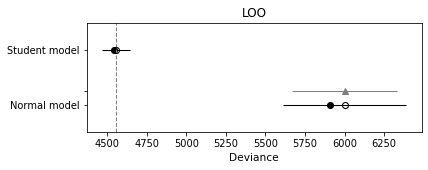

In [34]:
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()

WAIC

In [35]:
model_comparison = az.compare(model_dict, ic="waic", scale="deviance")
print(model_comparison)

               rank         waic     p_waic       d_waic  weight          se  \
Student model     0  4555.469832   4.826847     0.000000     1.0   88.745993   
Normal model      1  5998.530655  45.920358  1443.060824     0.0  388.484540   

                      dse  warning waic_scale  
Student model    0.000000     True   deviance  
Normal model   329.638207     True   deviance  


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


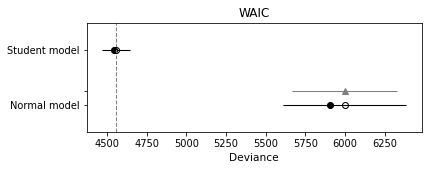

In [36]:
az.plot_compare(model_comparison)
plt.title('WAIC')
plt.show()


When assessing model performance, we can use metrics such as Lower WAIC and PSIS-LOOCV, which indicate that a lower value is better. In this case, the Student model performs better than the Normal model in these areas. However, we should also consider the simplicity and interpretability of a model when making conclusions. The p_loo and p_waic stats can give us an estimate of the effective number of parameters in a model. The Student model performs about 30% better than the Normal model, but is also about 9 times less complex.

### Excercise 3 - compare models with different numbers of predictors

In [38]:
code_5= CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file /home/lab6/code_5.stan to exe file /home/lab6/code_5
INFO:cmdstanpy:compiled model executable: /home/lab6/code_5


In [43]:
data_fit1 = {'N': N, 'K': 1, 'y': d2.loc[:, 'y[1]':f'y[{N}]'].values.reshape((N,)), 'X': d2.loc[:, 'X[1,1]':f'X[{N},1]'].values.reshape((N,1))}
pred1 = code_5.sample(data=data_fit1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [44]:
data_fit2 = {'N': N, 'K': 2, 'y': d2.loc[:, 'y[1]':f'y[{N}]'].values.reshape((N,)), 'X': d2.loc[:, 'X[1,1]':f'X[{N},2]'].values.reshape((N,2))}
pred2 = code_5.sample(data=data_fit2)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [45]:
data_fit3 = {'N': N, 'K': 3, 'y': d2.loc[:, 'y[1]':f'y[{N}]'].values.reshape((N,)), 'X': d2.loc[:, 'X[1,1]':f'X[{N},3]'].values.reshape((N,3))}
pred3 = code_5.sample(data=data_fit3)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [46]:
azdata1 = az.from_cmdstanpy(posterior=pred1)
azdata2 = az.from_cmdstanpy(posterior=pred2)
azdata3 = az.from_cmdstanpy(posterior=pred3)

In [47]:
model_dict = {"Model with 1 predictor": azdata1, "Model with 2 predictors": azdata2, "Model with 3 predictors": azdata3}

In [48]:
model_comparison = az.compare(model_dict, ic="loo", scale="deviance")
print(model_comparison)

                         rank          loo     p_loo        d_loo  \
Model with 1 predictor      0  5584.647600  2.166440     0.000000   
Model with 3 predictors     1  7031.454099  4.065985  1446.806499   
Model with 2 predictors     2  7031.924922  2.916420  1447.277322   

                               weight         se        dse  warning loo_scale  
Model with 1 predictor   1.000000e+00  57.183288   0.000000    False  deviance  
Model with 3 predictors  2.286098e-10  55.313489  58.369872    False  deviance  
Model with 2 predictors  0.000000e+00  55.279575  58.360580    False  deviance  


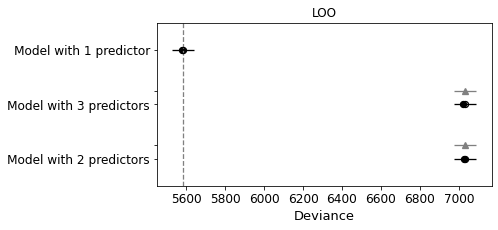

In [49]:
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()


In [50]:
model_comparison = az.compare(model_dict, ic="waic", scale="deviance")
print(model_comparison)

                         rank         waic    p_waic       d_waic  \
Model with 1 predictor      0  5584.647024  2.166152     0.000000   
Model with 3 predictors     1  7031.453900  4.065885  1446.806876   
Model with 2 predictors     2  7031.924850  2.916384  1447.277826   

                               weight         se        dse  warning  \
Model with 1 predictor   1.000000e+00  57.183201   0.000000    False   
Model with 3 predictors  1.294262e-14  55.313470  58.369812    False   
Model with 2 predictors  0.000000e+00  55.279591  58.360537    False   

                        waic_scale  
Model with 1 predictor    deviance  
Model with 3 predictors   deviance  
Model with 2 predictors   deviance  


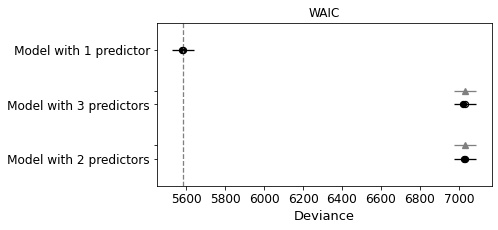

In [51]:
az.plot_compare(model_comparison)
plt.title('WAIC')
plt.show()
